## Predicting Medicaid Drug Spending Using State Drug Utilization Data 

## Business Understanding.
Medicaid is a government health program that is funded by both the State goverment and federal goverment in the United States. It is a program that helps cover for medical expenses of the middle income individuals making access to health care and medication easier and affordable. It is able to subsidize the cost of medication by paying for medical bills claimed by the various hospitals or pharamacies that have are covered under the rebate agreement with the federal government.

Key stakeholders are the state and federal government that are responsible for the funding of the program, alongside the policymakers and decision makers in the healthcare industry. This project basically helps us use the collected data over the years to identify patterns, predict spending, identify the high cost and low cost drugs and identify any possible loopholes such as reimbursing manufacturers that are not part of the rebate agreement leading to loss of money for Medicaid.

Moreover, it can help Medicaid in forecasting drug spending for better budget allocation and negotiate drug costs in the future. Some of the challenges we faced in this project is the large nature of our dataset, since it contains data that has been collected over the last decade which can be difficult to run models on without a powerful CPU, large number of missing values and the changing or flactuating drug prices of various drugs in the market.



## Problem Statement.
Medicaid has been spending millions of dollars on the payment of prescribed drugs by patients all over the country. Spending has increased making it difficult to monitor and control costs effectively. Data that has been collected over the years is huge and scattered so it is very difficult to identify the most used drugs, the most expensive drugs, how drug use differs between states and how to save money and make better decisions in future.Cureent reporting system mainly describes pas spending but fails to accurately predict future expenditures. Without predictive machine learning tools, stakeholders struggle to identify high cost drugs early and allocate budgets efficiently.This project aims to develop a machine learning  model that predicts drug spending based on utilization and reimbursement data available. This in the long run helps stakeholders in better decision making and budget allocation through interactive dashboards and a website that will be available for users to check future spending of specific drugs according to various descriptions.

## Objectives 

## General objective
To develop a machine learning model that predicts total drug spending using Medicaid Drug Utiluzation Data 


## Specific Objectives 
1. Identify high cost and low cost drugs 
2. Identify the most popular drugs
3. How drug use and spending differ between states
4. How to save money or make better decisions about Medicaid spending

In [38]:
# Importing neccessary labs
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
# Loading of the dataset
df = pd.read_csv(r"..\data\Medicaid_data.csv")
df.head()

,Utilization Type,State,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Suppression Used,Product Name,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed
0,FFSU,AK,2143380,2,1433,80,2025,2,False,TRULICITY,216.0,107.0,102976.40,98630.87,4345.53
1,FFSU,AK,2143480,2,1434,80,2025,2,False,TRULICITY,218.0,109.0,104481.92,101806.64,2675.28
2,FFSU,AK,2143611,2,1436,11,2025,2,False,EMGALITY P,21.0,20.0,15227.25,15227.25,0.00
3,FFSU,AK,2144511,2,1445,11,2025,2,False,TALTZ AUTO,33.0,30.0,231532.28,231532.28,0.00
4,FFSU,AK,2145780,2,1457,80,2025,2,False,MOUNJARO,208.0,104.0,108908.80,105953.32,2955.48


In [40]:
# Descriptive statistics of the dataset
df.describe()

,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed
count,1.313397e+06,1.313397e+06,1.313397e+06,1.313397e+06,1313397.0,1.313397e+06,1.313397e+06,1.313397e+06,1.313397e+06,1.313397e+06,1.313397e+06
mean,4.183809e+10,4.183796e+04,1.217695e+03,2.117419e+01,2025.0,1.499156e+00,3.498031e+04,5.475426e+02,8.287519e+04,7.918542e+04,3.689769e+03
std,2.771902e+10,2.771912e+04,2.042463e+03,2.732557e+01,0.0,4.999995e-01,5.538556e+05,4.531155e+03,1.659059e+06,1.623587e+06,6.958131e+04
min,2.021301e+06,2.000000e+00,0.000000e+00,0.000000e+00,2025.0,1.000000e+00,1.000000e-03,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.453907e+10,1.453900e+04,1.710000e+02,1.000000e+00,2025.0,1.000000e+00,7.300000e+02,2.200000e+01,3.906500e+02,3.672300e+02,0.000000e+00
50%,5.167213e+10,5.167200e+04,4.530000e+02,9.000000e+00,2025.0,1.000000e+00,2.254000e+03,5.500000e+01,1.368210e+03,1.272890e+03,0.000000e+00
75%,6.787706e+10,6.787700e+04,8.950000e+02,3.000000e+01,2025.0,2.000000e+00,8.973000e+03,1.930000e+02,6.798520e+03,6.183580e+03,5.207000e+01
max,9.999993e+10,9.999900e+04,9.999000e+03,9.900000e+01,2025.0,2.000000e+00,1.949860e+08,8.803950e+05,4.515656e+08,4.441219e+08,1.407676e+07


In [41]:
# Get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313397 entries, 0 to 1313396
Data columns (total 15 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Utilization Type                1313397 non-null  object 
 1   State                           1313397 non-null  object 
 2   NDC                             1313397 non-null  int64  
 3   Labeler Code                    1313397 non-null  int64  
 4   Product Code                    1313397 non-null  int64  
 5   Package Size                    1313397 non-null  int64  
 6   Year                            1313397 non-null  int64  
 7   Quarter                         1313397 non-null  int64  
 8   Suppression Used                1313397 non-null  bool   
 9   Product Name                    1313397 non-null  object 
 10  Units Reimbursed                1313397 non-null  float64
 11  Number of Prescriptions         1313397 non-null  float64
 12  

In [42]:
# Checking for missing values
df.isnull().sum()

Utilization Type                  0
State                             0
NDC                               0
Labeler Code                      0
Product Code                      0
Package Size                      0
Year                              0
Quarter                           0
Suppression Used                  0
Product Name                      0
Units Reimbursed                  0
Number of Prescriptions           0
Total Amount Reimbursed           0
Medicaid Amount Reimbursed        0
Non Medicaid Amount Reimbursed    0
dtype: int64

In [43]:
# Checking the duplicates in the dataset
df.duplicated().sum()

0

In [44]:
df.duplicated().value_counts()

False    1313397
Name: count, dtype: int64

In [45]:
df.columns 


Index(['Utilization Type', 'State', 'NDC', 'Labeler Code', 'Product Code',
       'Package Size', 'Year', 'Quarter', 'Suppression Used', 'Product Name',
       'Units Reimbursed', 'Number of Prescriptions',
       'Total Amount Reimbursed', 'Medicaid Amount Reimbursed',
       'Non Medicaid Amount Reimbursed'],
      dtype='object')

In [46]:
# Remove the national/suppressed "XX" row
df = df[df['State'] != 'XX'].copy()
print("Dataset shape after removing XX:", df.shape)
print("Remaining states:", sorted(df['State'].unique()))

Dataset shape after removing XX: (1194315, 15)
Remaining states: ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


## Standardizing Product Names

Drug names may be written in slightly different formats (extra spaces, capitalization differences).
To avoid double-counting the same drug, we standardize product names.

In [47]:
import re


df["Product Name_raw"] = df["Product Name"]

def clean_product_name(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()                 
    x = re.sub(r"\s+", " ", x)        
    x = x.casefold()                   
    return x

df["Product Name_std"] = df["Product Name_raw"].apply(clean_product_name)

# objective 1: high cost and low cost drugs

In [48]:
# objective 1: high cost and low cost drugs
drug_cost = df.groupby('Product Name_std')['Total Amount Reimbursed'].sum().reset_index()
drug_cost = drug_cost.sort_values(by='Total Amount Reimbursed', ascending=False)

In [49]:
high_cost_drugs = drug_cost.head(10)
high_cost_drugs

,Product Name_std,Total Amount Reimbursed
832,biktarvy,1.487752e+09
3451,jardiance,1.224935e+09
6718,trulicity,9.942157e+08
3353,invega sus,8.841717e+08
3154,humira(cf),8.621136e+08
3152,humira pen,7.755576e+08
5075,ozempic,6.612600e+08
1957,dupixent s,6.432030e+08
2055,eliquis,6.114578e+08
7410,zepbound,5.080595e+08


In [50]:
low_cost_drugs = drug_cost[drug_cost['Total Amount Reimbursed']> 0].tail(10)
low_cost_drugs

,Product Name_std,Total Amount Reimbursed
6981,vidaza,8.37
2894,glyrx (gly,6.14
3365,ipra/albut,6.08
6070,sm ibuprof,5.21
284,aller-chlo,4.64
5810,rocephin,3.56
5405,prevduo 3,3.00
1768,diflucan,1.00
7189,witch haze,0.84
7061,vonvendi 6,0.38


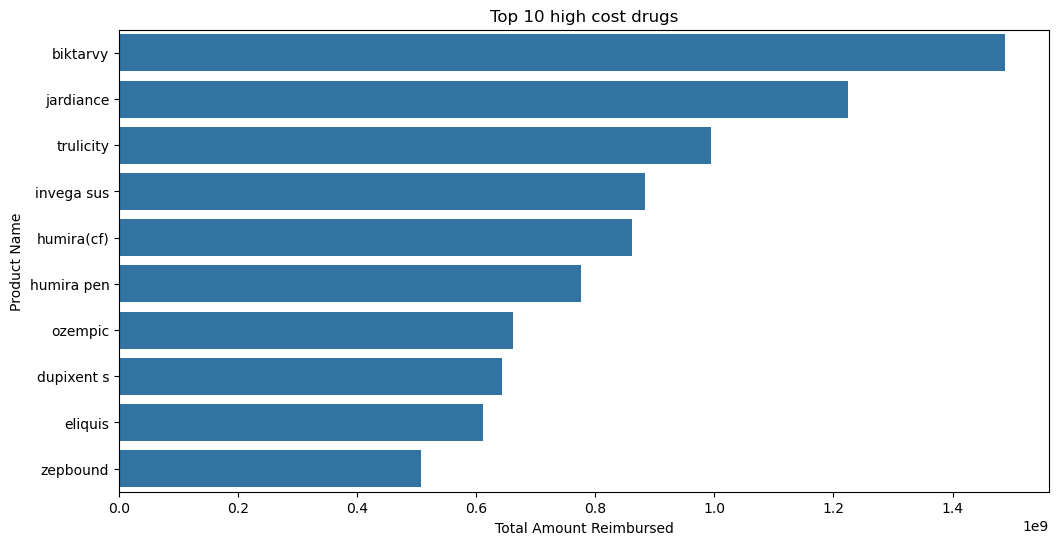

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(data=high_cost_drugs, 
 x="Total Amount Reimbursed", y="Product Name_std")
plt.title('Top 10 high cost drugs')
plt.xlabel("Total Amount Reimbursed")
plt.ylabel('Product Name')
plt.show()

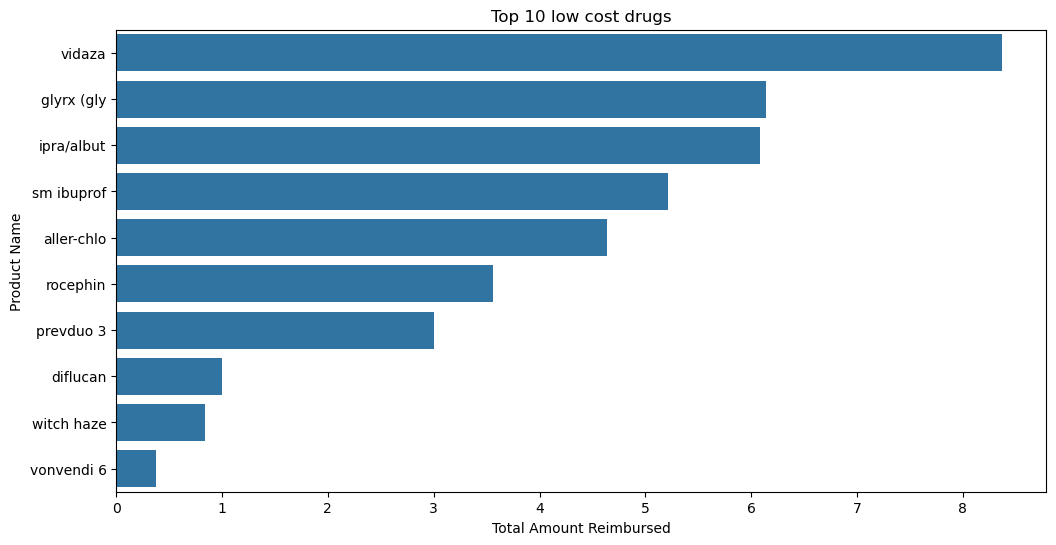

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(data=low_cost_drugs, x="Total Amount Reimbursed", y="Product Name_std")
plt.title('Top 10 low cost drugs')
plt.xlabel("Total Amount Reimbursed")
plt.ylabel('Product Name')
plt.show()

# Objective 2:most popular drugs

In [53]:
# objective 2:most popular drugs
drug_popularity = df.groupby('Product Name_std')['Number of Prescriptions'].sum().reset_index()
drug_popularity = drug_popularity.sort_values(by='Number of Prescriptions', ascending=False)

In [54]:
most_pop_drugs = drug_popularity.head(10)
most_pop_drugs

,Product Name_std,Number of Prescriptions
404,amoxicilli,8243538.0
261,albuterol,7264826.0
3223,ibuprofen,6543001.0
2636,fluticason,6042960.0
592,atorvastat,5987791.0
2764,gabapentin,5969243.0
4920,ondansetro,5741383.0
1177,cetirizine,5275403.0
4264,metformin,4655398.0
5982,sertraline,4481159.0


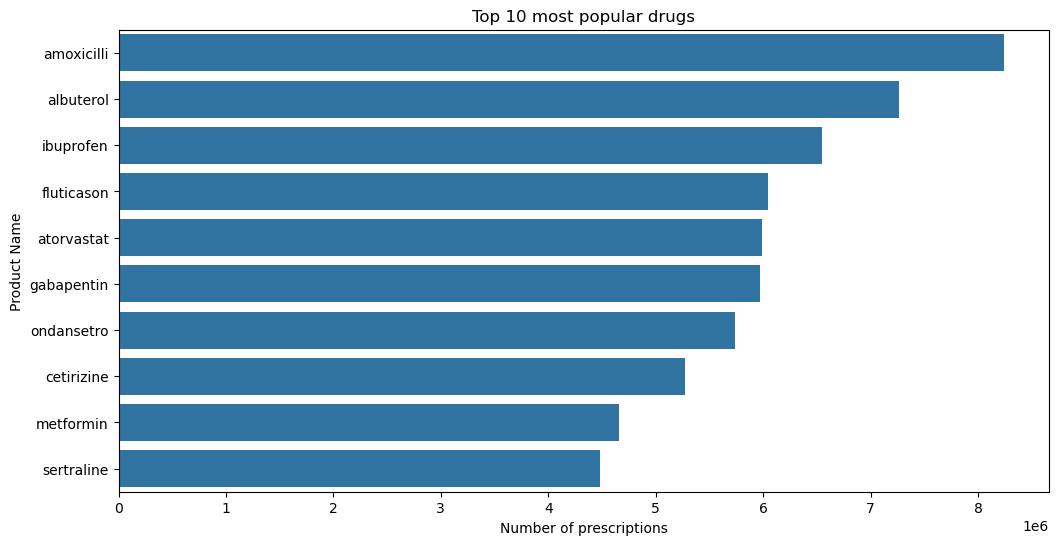

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(data=most_pop_drugs, x="Number of Prescriptions", y="Product Name_std")
plt.title('Top 10 most popular drugs')
plt.xlabel("Number of prescriptions")
plt.ylabel('Product Name')
plt.show()

In [56]:
state_drug_use = df.groupby('State')["Units Reimbursed"].sum().reset_index().sort_values(by='Units Reimbursed', ascending=False)
state_spending = df.groupby("State")['Total Amount Reimbursed'].sum().reset_index().sort_values(by="Total Amount Reimbursed", ascending=False)

In [57]:
state_drug_use.head(10)

,State,Units Reimbursed
4,CA,3.211247e+09
34,NY,2.403084e+09
35,OH,1.157968e+09
38,PA,1.060265e+09
44,TX,9.982072e+08
27,NC,8.075003e+08
22,MI,7.758629e+08
14,IL,7.165588e+08
9,FL,7.026974e+08
17,KY,6.896543e+08


In [58]:
state_spending.head(10)

,State,Total Amount Reimbursed
4,CA,8.143485e+09
34,NY,6.078539e+09
38,PA,2.644197e+09
35,OH,2.293810e+09
27,NC,2.265033e+09
22,MI,1.934683e+09
44,TX,1.749445e+09
14,IL,1.652224e+09
9,FL,1.643099e+09
15,IN,1.460833e+09


## Outlier Detection (IQR Method)

Drug spending is often highly skewed.
We use the Interquartile Range (IQR) method to detect extreme spending values

In [59]:
# Select your target column
column = "Total Amount Reimbursed"

# Calculate Q1 and Q3
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of Outliers:", outliers.shape[0])
print("Percentage of Outliers:", (outliers.shape[0] / df.shape[0]) * 100)

Lower Bound: -6938.217500000002
Upper Bound: 12536.322500000002
Number of Outliers: 183457
Percentage of Outliers: 15.360855385723196


The IQR method identified approximately 15.36% of observations as outliers. However, in the context of drug reimbursement data, these extreme values likely represent high-cost specialty medications rather than data errors.
Instead of removing outliers, we will apply a log transformation to reduce skewness while preserving critical high-cost drug information.

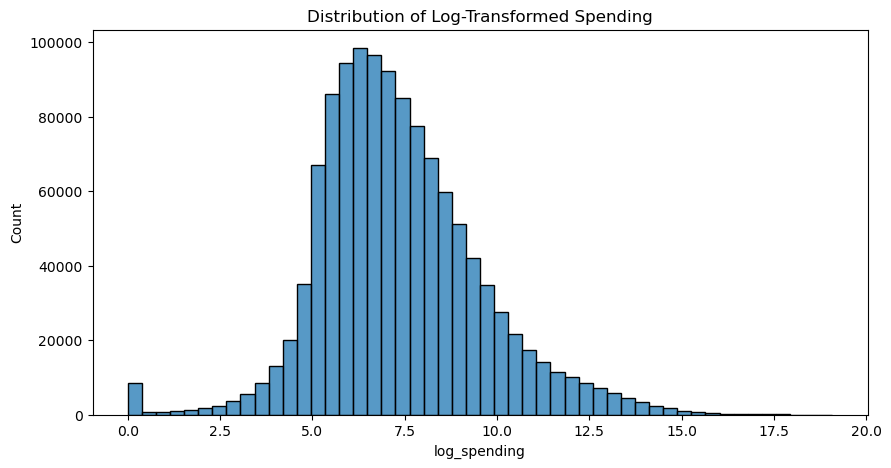

In [60]:
# Apply log transformation to reduce skewness
df["log_spending"] = np.log1p(df["Total Amount Reimbursed"])

# Check distribution visually
plt.figure(figsize=(10,5))
sns.histplot(df["log_spending"], bins=50)
plt.title("Distribution of Log-Transformed Spending")
plt.show()

## Why we didnt remove outliers 
In healthcare expenditure data, extreme values often represent legitimate high-cost treatments rather than data errors. Removing them would reduce the model’s ability to capture real financial risk. Therefore, we applied a log transformation to reduce skewness while preserving economic significance.

checking how many number of yrs are in our data set  
 then we can proceed with true time-based forecasting.

In [61]:
# Checking the number of unique years in the dataset 
df["Year"].unique()

array([2025], dtype=int64)

The dataset contains only one year (2025) of quarterly data.
As a result, long-term forecasting across multiple years is not possible.

This project  focuses on short-term quarterly expenditure prediction, where the model learns patterns from earlier quarters (Q1–Q3) to predict spending in the next quarter (Q2–Q4).

In [62]:
# Sort by quarter for correct shifting
df = df.sort_values(["State", "Product Name_std", "Quarter"])

# Create Target Variable

This creates Q1-Q2 , Q2-Q3 , Q3-Q4 , Q4 - NaN

In [63]:
# Predict next quarter spending
df["next_quarter_spending"] = (
    df.groupby(["State", "Product Name_std"])["Total Amount Reimbursed"]
    .shift(-1)
)

## Creating a Lag Feature 
This will make the model understand the spending momentum  

In [64]:
# Previous quarter spending
df["lag_1_spending"] = (
    df.groupby(["State", "Product Name_std"])["Total Amount Reimbursed"]
    .shift(1)
)

## Preparation of the Modeling Dataset 
We want to know the shape of the modeling dataset and the available quaters that we will be using for our model

In [65]:
df_model = df.dropna(
    subset=["next_quarter_spending", "lag_1_spending"]
).copy()

print("Modeling dataset shape:", df_model.shape)
print("Available quarters:", df_model["Quarter"].unique())

Modeling dataset shape: (1033274, 20)
Available quarters: [1 2]


## Overview of the dataset 
After creating lag and target variables, the final modeling dataset contains 1,033,274 observations.

Only two quarters remain usable due to the shifting process:

Quarter 1 → Used for training

Quarter 2 → Used for testing

This setup simulates real-world forecasting, where earlier quarter data is used to predict future spending.

In [66]:
# Check all available columns
print(df_model.columns.tolist())

['Utilization Type', 'State', 'NDC', 'Labeler Code', 'Product Code', 'Package Size', 'Year', 'Quarter', 'Suppression Used', 'Product Name', 'Units Reimbursed', 'Number of Prescriptions', 'Total Amount Reimbursed', 'Medicaid Amount Reimbursed', 'Non Medicaid Amount Reimbursed', 'Product Name_raw', 'Product Name_std', 'log_spending', 'next_quarter_spending', 'lag_1_spending']


In [67]:
# Recreate cost-based features INSIDE df_model
# Cost per prescription
df_model["cost_per_prescription"] = (
    df_model["Total Amount Reimbursed"] /
    df_model["Number of Prescriptions"].replace(0, np.nan)
)

# Cost per unit
df_model["cost_per_unit"] = (
    df_model["Total Amount Reimbursed"] /
    df_model["Units Reimbursed"].replace(0, np.nan)
)

# Replace infinite or NaN values with 0
df_model["cost_per_prescription"] = df_model["cost_per_prescription"].fillna(0)
df_model["cost_per_unit"] = df_model["cost_per_unit"].fillna(0)

print("Cost features successfully created.")
print(df_model[["cost_per_prescription", "cost_per_unit"]].head())

Cost features successfully created.
      cost_per_prescription  cost_per_unit
6913            2744.505814    2744.505814
2501            2614.323333    2614.323333
2507            2020.898462    2020.898462
4533             307.090345     307.090345
7952              72.130000       0.512105


In [68]:
df_model.isna().sum()# checking for missing values in the new features

Utilization Type                  0
State                             0
NDC                               0
Labeler Code                      0
Product Code                      0
Package Size                      0
Year                              0
Quarter                           0
Suppression Used                  0
Product Name                      0
Units Reimbursed                  0
Number of Prescriptions           0
Total Amount Reimbursed           0
Medicaid Amount Reimbursed        0
Non Medicaid Amount Reimbursed    0
Product Name_raw                  0
Product Name_std                  0
log_spending                      0
next_quarter_spending             0
lag_1_spending                    0
cost_per_prescription             0
cost_per_unit                     0
dtype: int64

In [69]:
# Checking if the columns are numeric for modeling
df_model.columns

Index(['Utilization Type', 'State', 'NDC', 'Labeler Code', 'Product Code',
       'Package Size', 'Year', 'Quarter', 'Suppression Used', 'Product Name',
       'Units Reimbursed', 'Number of Prescriptions',
       'Total Amount Reimbursed', 'Medicaid Amount Reimbursed',
       'Non Medicaid Amount Reimbursed', 'Product Name_raw',
       'Product Name_std', 'log_spending', 'next_quarter_spending',
       'lag_1_spending', 'cost_per_prescription', 'cost_per_unit'],
      dtype='object')

In [74]:
# Creating log-transformed target variable
# Log transform total spending to reduce skewness
df_model["log_target"] = np.log1p(df_model["Total Amount Reimbursed"])

print("Log target created successfully.")
print(df_model["log_target"].head())

Log target created successfully.
6913    11.678565
2501    11.164612
2507    10.176285
4533     9.094550
7952     7.274895
Name: log_target, dtype: float64


## Train-Test Split (Time-Based)
Train Q1
Test  Q2

In [75]:
# Time-based split (Quarter 1 → Train, Quarter 2 → Test)

train = df_model[df_model["Quarter"] == 1].copy()
test = df_model[df_model["Quarter"] == 2].copy()

feature_cols = [
    "State",
    "Product Name_std",
    "Quarter",
    "lag_1_spending",
    "Units Reimbursed",
    "Number of Prescriptions",
    "cost_per_unit",
    "cost_per_prescription"
]

X_train = train[feature_cols]
y_train = train["log_target"]

X_test = test[feature_cols]
y_test = test["log_target"]

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (517853, 8)
Test shape: (515421, 8)
